#Car Classification Dataset (Kaggle)
-> É possível validar qual carro é melhor?

Variáveis:
- buying: Custo de compra do carro, variando em categorias como vhigh (muito alto), high (alto), med (médio) e low (baixo).

- maint: Custo de manutenção do carro, também categorizado como vhigh, high, med e low.

- doors: Número de portas do carro, indicado como um valor numérico (2, 3, 4) ou 5more (mais de 5 portas).

- persons: Capacidade de passageiros, ou seja, o número de pessoas que o carro pode acomodar. Os valores podem ser 2, 4, ou more (mais de 4 pessoas).

- lug_boot: Tamanho do porta-malas, com categorias small (pequeno), med (médio) e big (grande).

- safety: Nível de segurança do carro, também categorizado como low (baixo), med (médio) ou high (alto).

- class: Classificação do carro, que indica sua aceitação. Neste dataset, as classes possíveis são:
unacc: inaceitável (0)
acc: aceitável (1)
good: bom (2)
vgood: muito bom (3)

In [22]:
import pandas as pd
from feature_engine import encoding
from sklearn import tree, linear_model, naive_bayes, metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/cars.csv")
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
X = df.drop('class', axis=1) #Features
y = df['class'] #Resposta

In [11]:
#OneHotEncoding
onehot = encoding.OneHotEncoder(variables=X.columns.to_list())
onehot.fit(X)

X = onehot.transform(X)
X


,buying_vhigh,buying_high,buying_med,buying_low,maint_vhigh,maint_high,maint_med,maint_low,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_small,lug_boot_med,lug_boot_big,safety_low,safety_med,safety_high
0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1724,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1725,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
1726,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Modelo de árvore de decisão

[Text(0.75, 0.9, 'safety_low <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [384, 69, 1210, 65]\nclass = unacc'),
 Text(0.625, 0.7, 'persons_2 <= 0.5\ngini = 0.579\nsamples = 1152\nvalue = [384, 69, 634, 65]\nclass = unacc'),
 Text(0.5, 0.5, 'buying_vhigh <= 0.5\ngini = 0.629\nsamples = 768\nvalue = [384, 69, 250, 65]\nclass = acc'),
 Text(0.25, 0.3, 'buying_high <= 0.5\ngini = 0.629\nsamples = 576\nvalue = [312, 69, 130, 65]\nclass = acc'),
 Text(0.125, 0.1, 'gini = 0.642\nsamples = 384\nvalue = [204, 69, 46, 65]\nclass = acc'),
 Text(0.375, 0.1, 'gini = 0.492\nsamples = 192\nvalue = [108, 0, 84, 0]\nclass = acc'),
 Text(0.75, 0.3, 'maint_med <= 0.5\ngini = 0.469\nsamples = 192\nvalue = [72, 0, 120, 0]\nclass = unacc'),
 Text(0.625, 0.1, 'gini = 0.375\nsamples = 144\nvalue = [36, 0, 108, 0]\nclass = unacc'),
 Text(0.875, 0.1, 'gini = 0.375\nsamples = 48\nvalue = [36, 0, 12, 0]\nclass = acc'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 384\nvalue = [0, 0, 384, 0]\nclass = unacc'),
 Text(0.

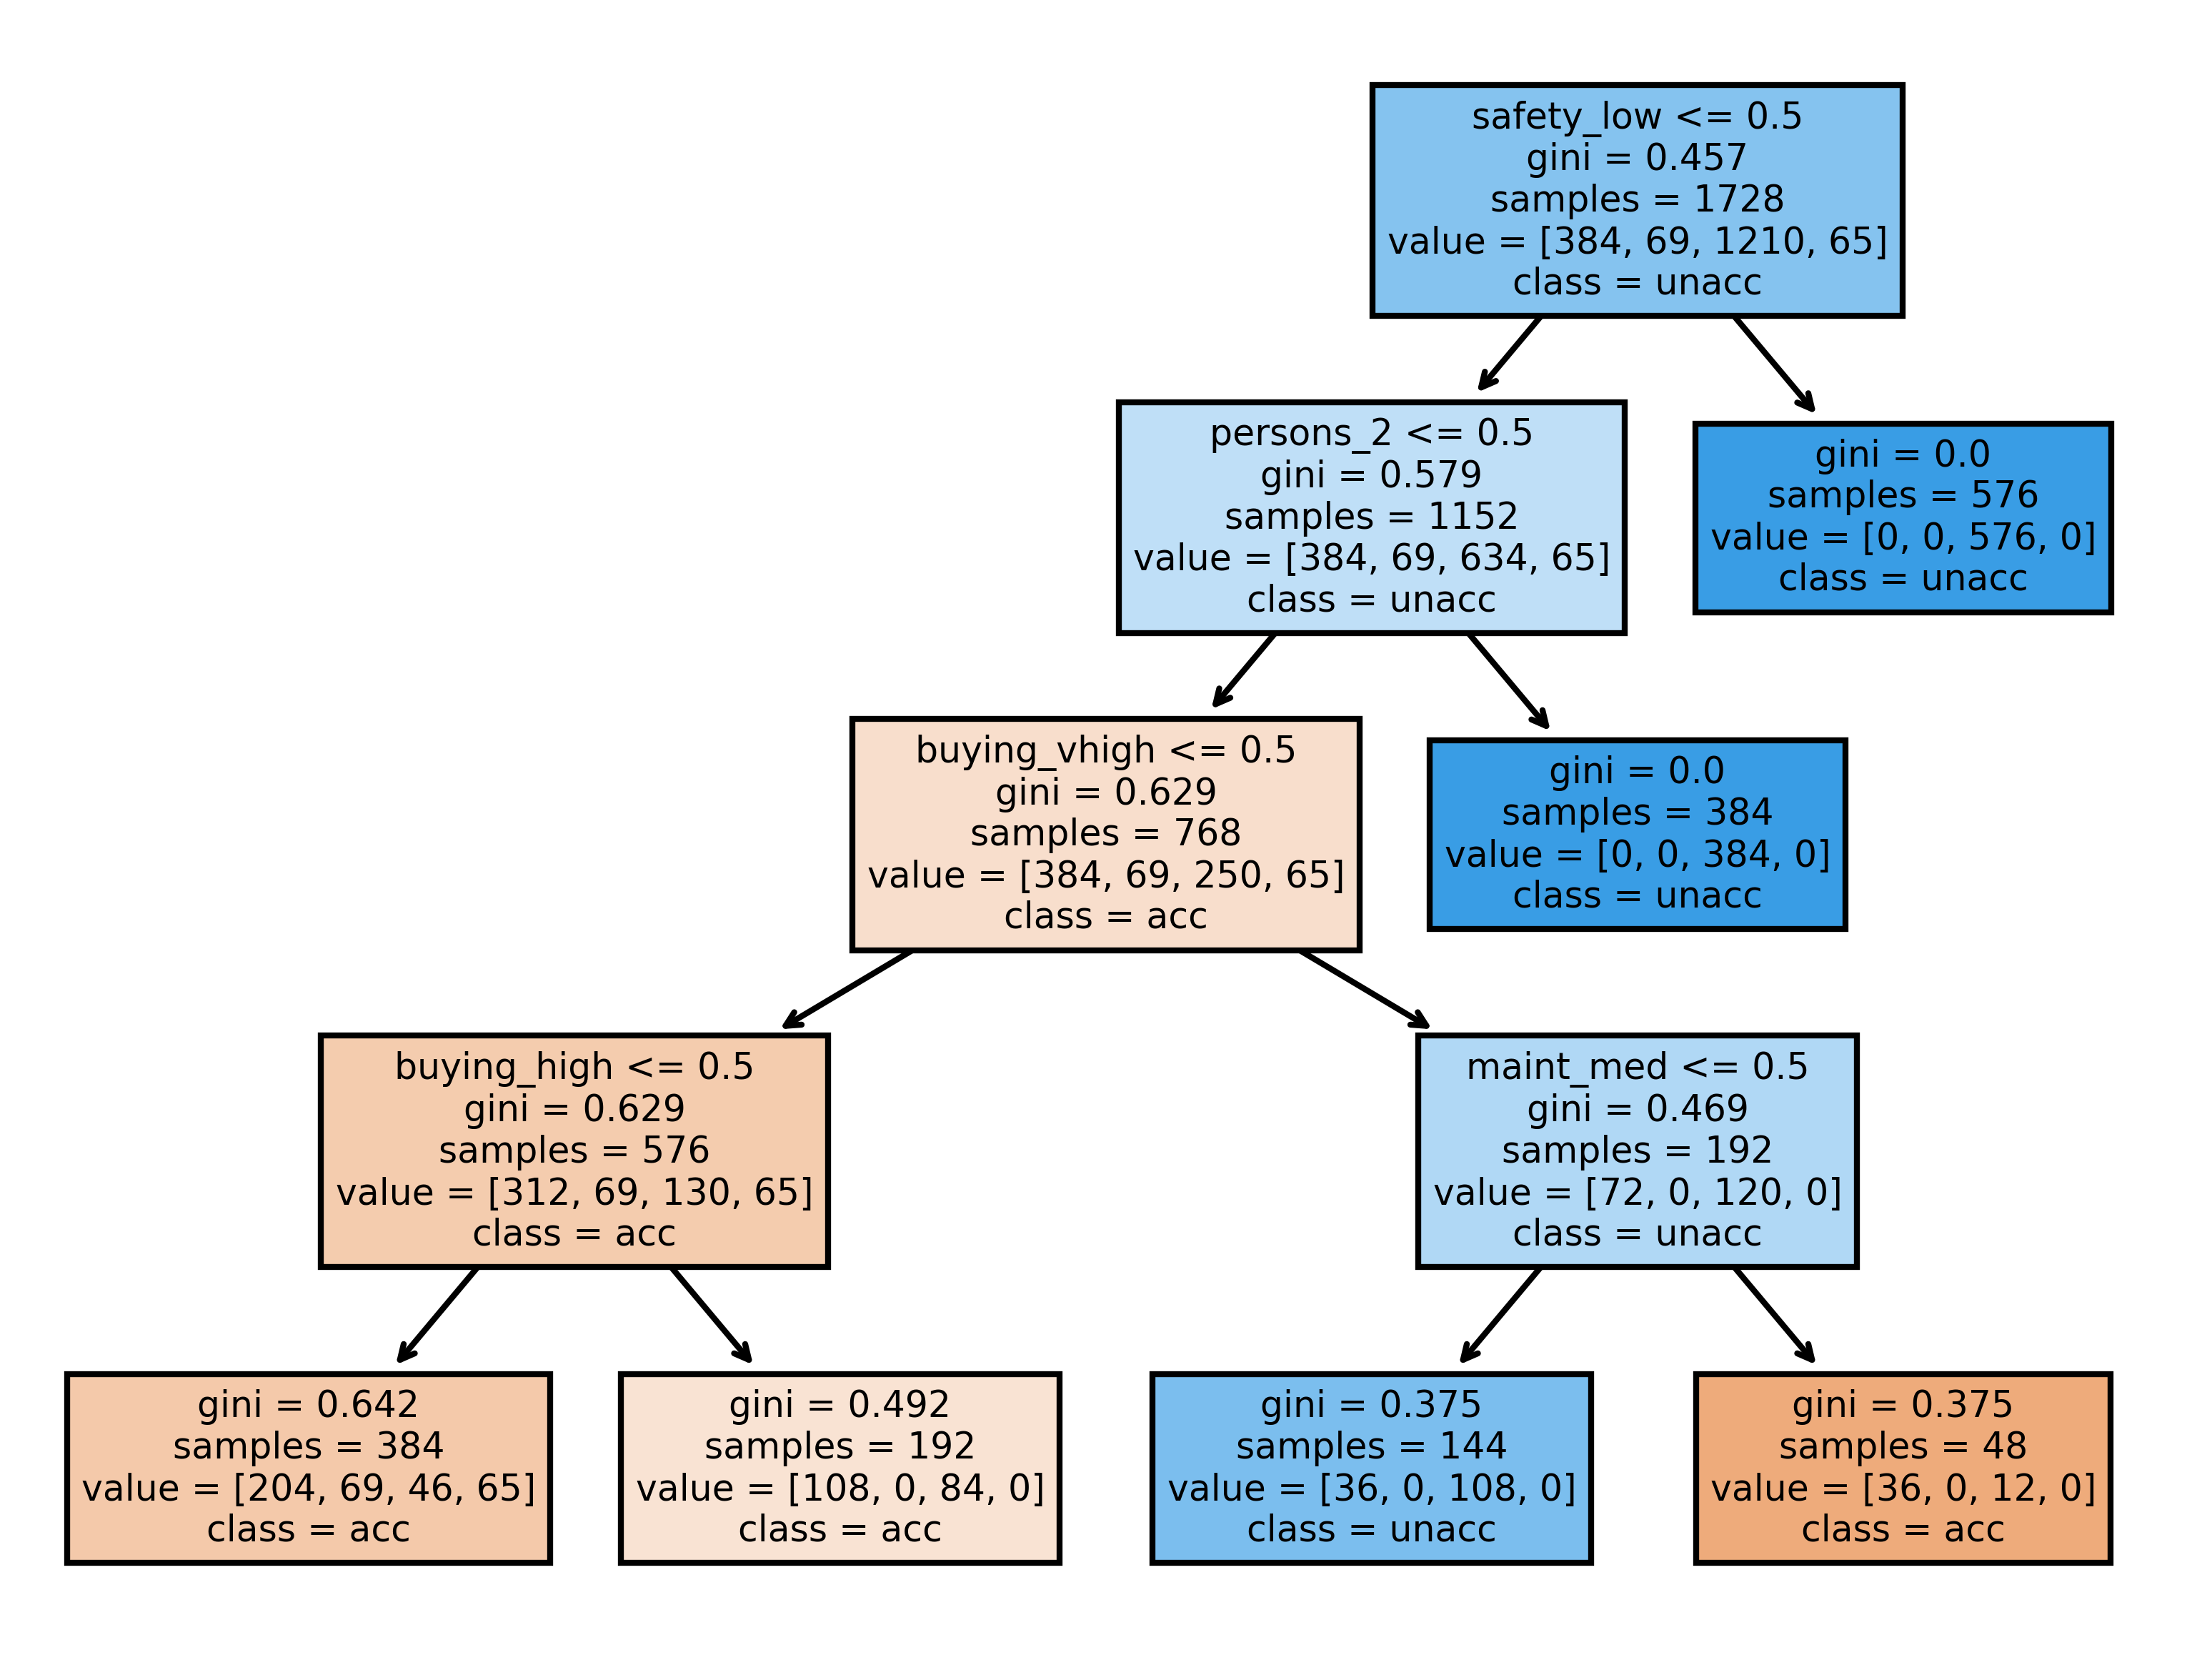

In [17]:
#Modelo de árvore de decisão
arvore_model = tree.DecisionTreeClassifier(max_depth=4)
arvore_model.fit(X, y)

#Visualização
plt.figure(dpi=600)
tree.plot_tree(arvore_model,
               class_names=arvore_model.classes_,
               feature_names=X.columns,
               filled=True)

Comparando modelos

In [29]:
#Árvore de decisão
arvore_model = tree.DecisionTreeClassifier()
arvore_model.fit(X, y) #Aprendizado
arvore_predict = arvore_model.predict(X) #Predição

#Regressão logística
reg_model = linear_model.LogisticRegression()                                   
reg_model.fit(X, y) #Aprendizado
reg_predict = reg_model.predict(X) #Predição

#Naive Bayes
naive_model = naive_bayes.GaussianNB()
naive_model.fit(X, y) #Aprendizado
naive_predict = naive_model.predict(X) #Predição


In [30]:
#Acurácia
arvore_acc = metrics.accuracy_score(y, arvore_predict)
print("Acurácia - árvore de decisão: ", arvore_acc)

reg_acc = metrics.accuracy_score(y, reg_predict)
print("Acurácia - regressão logística: ", reg_acc)

naive_acc = metrics.accuracy_score(y, naive_predict)
print("Acurácia - naive bayes: ", naive_acc)

Acurácia - árvore de decisão:  1.0
Acurácia - regressão logística:  0.9201388888888888
Acurácia - naive bayes:  0.8026620370370371


In [33]:
#Precisão
arvore_prec = metrics.precision_score(y, arvore_predict, average='macro')
print("Precisão - árvore de decisão: ", arvore_prec)

reg_prec = metrics.precision_score(y, reg_predict, average='macro')
print("Precisão - regressão logística: ", reg_prec)

naive_prec = metrics.precision_score(y, naive_predict, average='macro')
print("Precisão - naive bayes: ", naive_prec)

Precisão - árvore de decisão:  1.0
Precisão - regressão logística:  0.8443494136723061
Precisão - naive bayes:  0.6752450980392157
